# Direct Marketing Decision Tree Classifier

To build a decision tree model to classify customers as Good/Bad based on amount spent.
Good - if amount spent is >average amount spent

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import os
os.getcwd()

'C:\\Users\\Varun R Bhat\\Downloads\\Jigsaw\\Direct_Marketing_Data_Set'

In [3]:
dm = pd.read_csv('directmarketing.csv',sep=',',header=0)
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    1000 non-null int64
Cust_Id        1000 non-null int64
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [9]:
# #--According to the marketer customer who spends more than the average spend is considered as Good--#
# Target variable
dm['Target'] = (dm.AmountSpent>dm.AmountSpent.mean()).map({True:1,False:0})
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [10]:
# Missing values
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
Target           0
dtype: int64

In [12]:
# Create separate category 'Missing' for History 
dm['History1'] = dm.History.replace({np.nan:'Missing'})
print(dm.History1.unique())
print(dm.isnull().sum())
dm.head()

['High' 'Low' 'Medium' 'Missing']
Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
Target           0
History1         0
dtype: int64


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target,History1
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0,High
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1,High
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0,Low
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1,High
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1,High


In [16]:
# Converting Children and Catalogs into categorical variables
dm['Children'] = dm.Children.astype('category')
dm['Catalogs'] = dm.Catalogs.astype('category')
dm.dtypes

Age              object
Gender           object
OwnHome          object
Married          object
Location         object
Salary            int64
Children       category
History          object
Catalogs       category
AmountSpent       int64
Cust_Id           int64
Target            int64
History1         object
dtype: object

In [15]:
# Target variable and Predictor variables
y = dm['Target']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [18]:
X = dm.drop(['History','AmountSpent','Cust_Id','Target'],axis=1)
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,History1
0,Old,Female,Own,Single,Far,47500,0,6,High
1,Middle,Male,Rent,Single,Close,63600,0,6,High
2,Young,Female,Rent,Single,Close,13500,0,18,Low
3,Middle,Male,Own,Married,Close,85600,1,18,High
4,Middle,Female,Own,Single,Close,68400,0,12,High


In [19]:
# Dummy variables
X = pd.get_dummies(X)
X.head()

,Salary,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,...,Children_2,Children_3,Catalogs_6,Catalogs_12,Catalogs_18,Catalogs_24,History1_High,History1_Low,History1_Medium,History1_Missing
0,47500,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,63600,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,13500,0,0,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3,85600,1,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,68400,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [20]:
# Decision Tree Model
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [21]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test) # Accuracy Score

0.8533333333333334

In [22]:
# AUC value
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.895586062252729

In [30]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [32]:
from IPython.display import Image

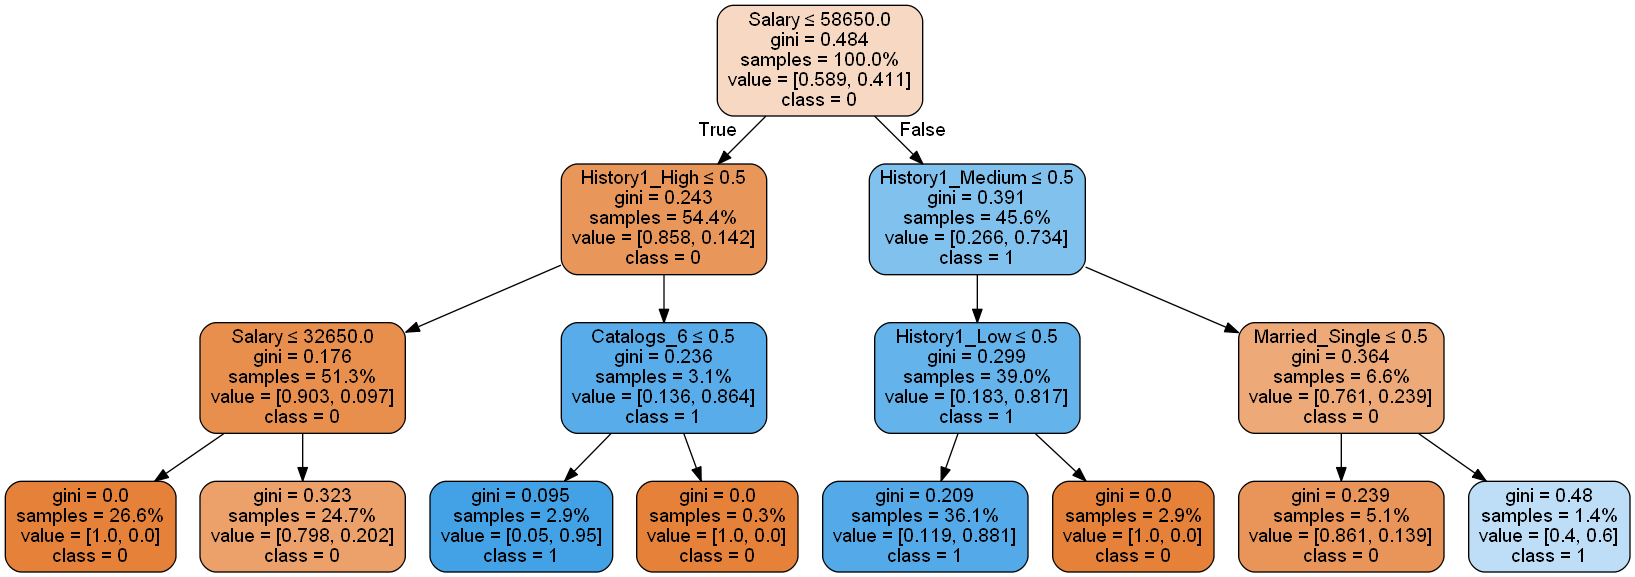

In [33]:
Image(graph.create_png())

### Grid Search-Cross Validation

In [34]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [36]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]},cv=5)
mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [37]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [40]:
# Running model with max_depth=5 as per best_estimator_
clf2=tree.DecisionTreeClassifier(max_depth=5,random_state=200)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test) 

0.8566666666666667

In [41]:
# AUC value
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1])

0.9055484055484055

In [46]:
y_pred = clf2.predict(X_test)

In [56]:
metrics.confusion_matrix(y_test,y_pred)

array([[169,  20],
       [ 23,  88]], dtype=int64)